## Calculating Compound Interest with Recursion and Looping

 * let’s determine the value of a loan or an investment with compounded interest. In order to determine what this value would be, we need 4 things:

* Duration in Years
* Interest Rate
* Number of Times Compounded Per Year
* Principal Amount
* 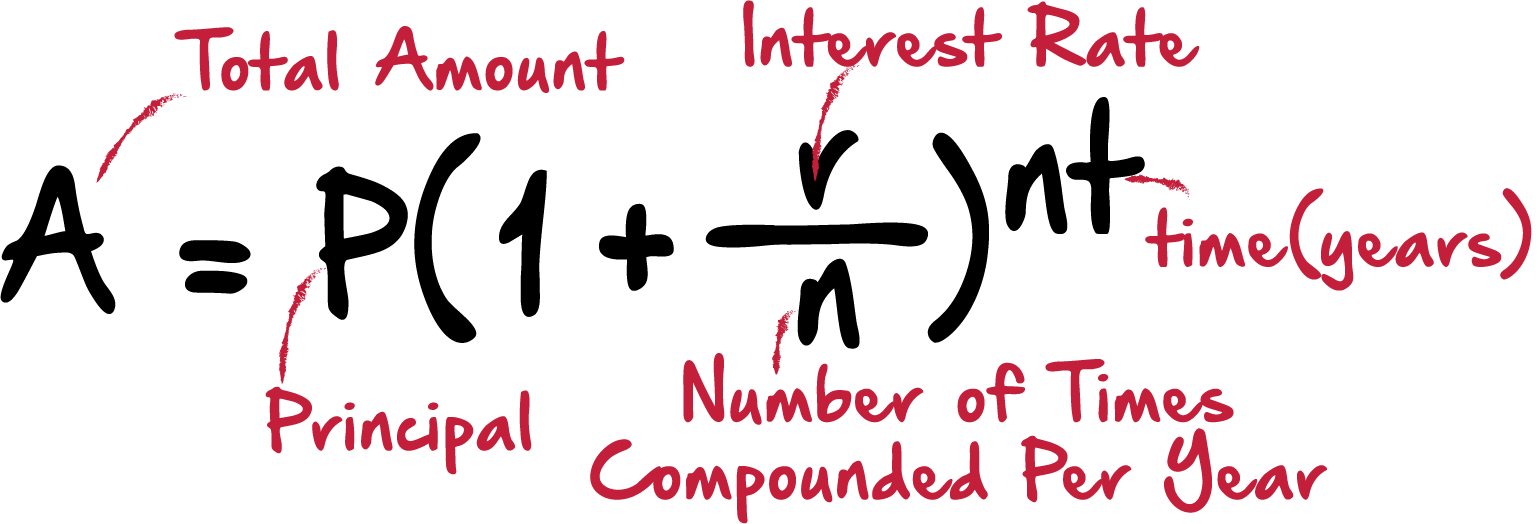

However, this would calculate the entire amount at once. Instead, we’ll want to do it in a loop or with recursion. In that case, our time variable (nt), will actually be handled in iterations.

In [16]:
durationInYears = 10
interestRate = .06
compoundedPerYear = 12 
principalAmount = 4000

## with loop

In [17]:
def compoundInterest(principal, compounded, duration, rate):
    totalCompounded = duration * compounded
    for i in range(1, (totalCompounded+1)):
        principal = principal*(1+(rate/compounded))
    return principal

In [18]:
print (compoundInterest(principalAmount, compoundedPerYear, durationInYears, interestRate))

7277.586936129165


## Compound Interest Calculation with Recursion

* With recursion, we could set it up in a similar way. We could give the function total duration, and basically have two conditions:

* Condition 1: The Duration is not 0.
* Do the compounding interest calculation. Add the new iterest to the principal amount. Subtract 1 from the total duration. * Call the sub again with the new principal amount and the new duration.
* Condition 2 (base condition) : Duration is 0.
* Return the Principal Amount.
* In our previous recursive example, we start at 5, and terminate the function when it reaches 0.

* Here, we would do the same thing, but would start at 120 instead.

In [19]:
def compoundRecursion(principal, compounded, duration, rate, numberOfRecursions):
    if numberOfRecursions == 0:
        totalDuration = compounded * duration
    elif numberOfRecursions != 0:
        totalDuration = duration
    if duration == 0:
        return principal
    else:
        newDuration = totalDuration - 1
        amount = principal*(1+(rate/compounded))
        return compoundRecursion(amount, compounded, newDuration, rate, 1)

In [20]:
print (compoundRecursion(principalAmount, compoundedPerYear, durationInYears, interestRate, 0))

7277.586936129165


Here, We either call the function again, or return the revised principal amount. Each time we call the new function, we call it, but pass in the duration minus 1. When the duration is equal to 0, then we only return the principal amount.

The above example also gives us a great example of when recursion may work far better than a loop.

Let’s imagine that instead of keeping track of just the numbers, like we’re doing above, we want to keep track of other data at each compounding interval as well. For example, we may want to take into account how regular payments would affect the life of the loan. We might want to terminate the loop before the sequence ends. If the total number of times that interest on a loan would be compounded is 120, then the length of our list is 120. But, if the loan amount is 0 after only 100 iterations, we have 20 unused and unnecessary list elements hanging out at the end of our list. Further complicating a loop scenario is that the value of the variables like the loan amount depend on the value of the loan amount at the previous iteration. It’s not that this is particularly difficult, but it is messy.

Visually, here’s how these problems might look:
* 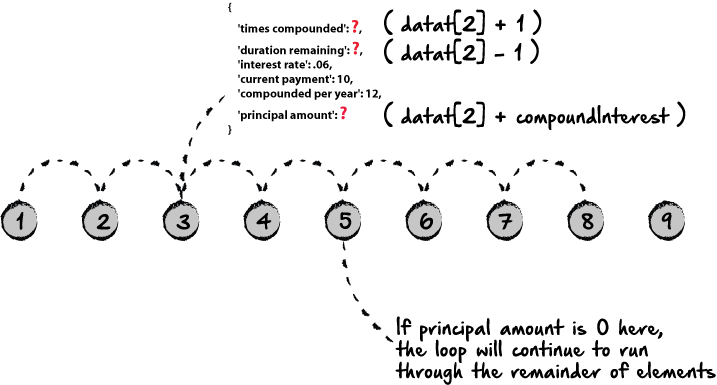

Our function would basically consist of an if else statement. While it could get more complex if we so desired, we can probably accomplish all we want to do here. Eventually, we want to return the finished data, which will have the loan amount and current payment at each interval that the loan is compounded.

### step 1. Create the Array

In [ ]:
durationInYears = 10
compoundedPerYear = 12

In [ ]:
array = [{
    'times compounded': 0,
    'duration remaining': 10,
    'interest rate': .06,
    'current payment': 50,
    'compounded per year': 12,
    'principal amount': 4000,
    'total compounded': compoundedPerYear*durationInYears
}]*(compoundedPerYear*durationInYears)

At this point, we have an array the length of the total number of times the loan would be compounded. Each element contains the same data, which we will change recursively.

## Step 2. Create the function & base condition

In [ ]:
def recursiveData(inputArr, outputArr):
    if len(inputArr) == 0 or inputArr[-1]['principal amount'] <= 0:
        return outputArr

Again, our base condition covers the two scenarios that we would want to terminate the function with. If either we’ve reached the end of the duration (len(inputArr) == 0) or we’ve paid off the entire loan ( inputArr[-1][‘principal amount’] <= 0).

## Step 3. Create the else statement, and define the current, inputArray & outputArray variables

In [ ]:
else:
        current = inputArr[:1][0]
        inputArrayLength = len(inputArr[1:])
        outputArray = outputArr

At this point, the current element we’re popping off of the inputArr is current. And our output array is also defined. If we need to access our input array later, we could do so with the variable inputArr.

## Step 4. If the output array length is 0, pop the first element off of the input array, (current) and put it in the output without changing it.

In [ ]:
if len(outputArray) == 0:
            outputArray.append(current)
            return recursiveData(inputArr[1:], outputArray)

Now, our two arrays should like like the diagram we saw above, when the recursive function is called initially.

## step 5. If the output array is greater than 0, modify all the values for our current element.

In [ ]:
else:
            newTimesCompounded = outputArray[-1]['times compounded'] + 1
            newDurationRemaining = current['duration remaining']
            if ((outputArray[-1]['times compounded'] + 1) % 12) == 0:
                newDurationRemaining = outputArray[-1]['duration remaining'] - 1
            principal = (outputArray[-1]['principal amount'])*(1+(outputArray[-1]
                                                                  ['interest rate']/outputArray[-1]['compounded per year']))
            currentPayment = current['current payment']
            if currentPayment > principal:
                currentPayment = principal
            newPrincipalAmount = (principal - currentPayment)
            newTotalCompounded = outputArray[-1]['total compounded'] - 1
            newCurrent = {
                'times compounded': newTimesCompounded,
                'duration remaining': newDurationRemaining,
                'interest rate': current['interest rate'],
                'current payment': currentPayment,
                'compounded per year': current['compounded per year'],
                'principal amount': newPrincipalAmount,
                'total compounded': newTotalCompounded
            }

At this point, we could print our newCurrent variable, which is the modified current variable, and it would have all the new data after it has been compounded and a payment has been made on the loan. Next, we’ll need to add this variable to our output array.

## Step 6. Add the new current variable to the output array

In [ ]:
outputArray.append(newCurrent)

## Step 7. Call the recursive function with the new parameters

In [ ]:
return recursiveData(inputArr, outputArray)

## And we’re done! Let’s take a look at the entire code block in one piece:

In [22]:
durationInYears = 10
compoundedPerYear = 12

In [23]:
array = [{
    'times compounded': 0,
    'duration remaining': 10,
    'interest rate': .06,
    'current payment': 2000,
    'compounded per year': 12,
    'principal amount': 4000,
    'total compounded': compoundedPerYear*durationInYears
}]*(compoundedPerYear*durationInYears)

In [24]:
def recursiveData(inputArr, outputArr):
    if len(inputArr) == 0 or inputArr[-1]['principal amount'] <= 0:
        return outputArr
    else:
        current = inputArr[:1][0]
        inputArrayLength = len(inputArr[1:])
        outputArray = outputArr
        if len(outputArray) == 0:
            outputArray.append(current)
            return recursiveData(inputArr[1:], outputArray)
        else:
            newTimesCompounded = outputArray[-1]['times compounded'] + 1
            newDurationRemaining = current['duration remaining']
            if ((outputArray[-1]['times compounded'] + 1) % 12) == 0:
                newDurationRemaining = outputArray[-1]['duration remaining'] - 1
            principal = (outputArray[-1]['principal amount'])*(1+(outputArray[-1]
                                                                  ['interest rate']/outputArray[-1]['compounded per year']))
            currentPayment = current['current payment']
            if currentPayment > principal:
                currentPayment = principal
            newPrincipalAmount = (principal - currentPayment)
            newTotalCompounded = outputArray[-1]['total compounded'] - 1
            newCurrent = {
                'times compounded': newTimesCompounded,
                'duration remaining': newDurationRemaining,
                'interest rate': current['interest rate'],
                'current payment': currentPayment,
                'compounded per year': current['compounded per year'],
                'principal amount': newPrincipalAmount,
                'total compounded': newTotalCompounded
            }
            outputArray.append(newCurrent)
            inputArr = [newCurrent]*inputArrayLength
            return recursiveData(inputArr, outputArray)

In [25]:
returnData = recursiveData(array, [])
for i in returnData:
    print (i)

{'times compounded': 0, 'duration remaining': 10, 'interest rate': 0.06, 'current payment': 2000, 'compounded per year': 12, 'principal amount': 4000, 'total compounded': 120}
{'times compounded': 1, 'duration remaining': 10, 'interest rate': 0.06, 'current payment': 2000, 'compounded per year': 12, 'principal amount': 2019.9999999999995, 'total compounded': 119}
{'times compounded': 2, 'duration remaining': 10, 'interest rate': 0.06, 'current payment': 2000, 'compounded per year': 12, 'principal amount': 30.099999999999227, 'total compounded': 118}
{'times compounded': 3, 'duration remaining': 10, 'interest rate': 0.06, 'current payment': 30.25049999999922, 'compounded per year': 12, 'principal amount': 0.0, 'total compounded': 117}


Working with recursion can be daunting at first. But there are some cases where it can be an amazing tool if used correctly. Likewise, loops can also be a better choice, depending on the scenario.